# Introduction  
## About the Dataset
This data set consists of Placement data of students in Jain University, Bangalore. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

# Problem Statement
**To predict whether or not a candidate will be placed(or employed) on the basis of his/her Secondary %, Higher Secondary %, Undergraduate Degree %, MBA % and Employability Test %**

# The Methodology
1. **Loading and Cleaning + Preprocessing the Data**
2. **Exploratory Data Analysis(EDA)**
    * Pairplot
    * Clustermap to Visualize Correlation
    * Bubble Plot(s)
    * Tree Chart
    * Pie Chart
    * Histogram
    * Trendline
    * Violin Plot
    * Swarm Plot
3. **Predictive Modelling**
    * Logistic Regression
    * Naive Bayes Classifier
    * Random Forest Classifier
    * Support Vector Machine(SVM) Classifier
    * Deep Neural Network(DNN)


# Importing Relevant Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

# Loading the Data

In [2]:
data_path = '../input/factors-affecting-campus-placement/Placement_Data_Full_Class.csv'

In [3]:
raw_csv_data = pd.read_csv(data_path)
raw_csv_data

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# Preprocessing the Data

In [4]:
df_comp = raw_csv_data.copy()

In [5]:
df_comp.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [6]:
df_comp.fillna(df_comp['salary'].mean(), inplace = True)

#### Dropping sl_no as it is an insignificant feature

In [7]:
del df_comp['sl_no']

In [8]:
df_comp

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.000000
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.000000
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.000000
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.405405
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.000000
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.000000
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.000000
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.000000


# Exploratory Data Analysis

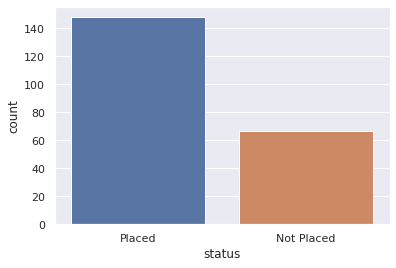

In [9]:
sns.countplot(df_comp.status)

## Pairplot

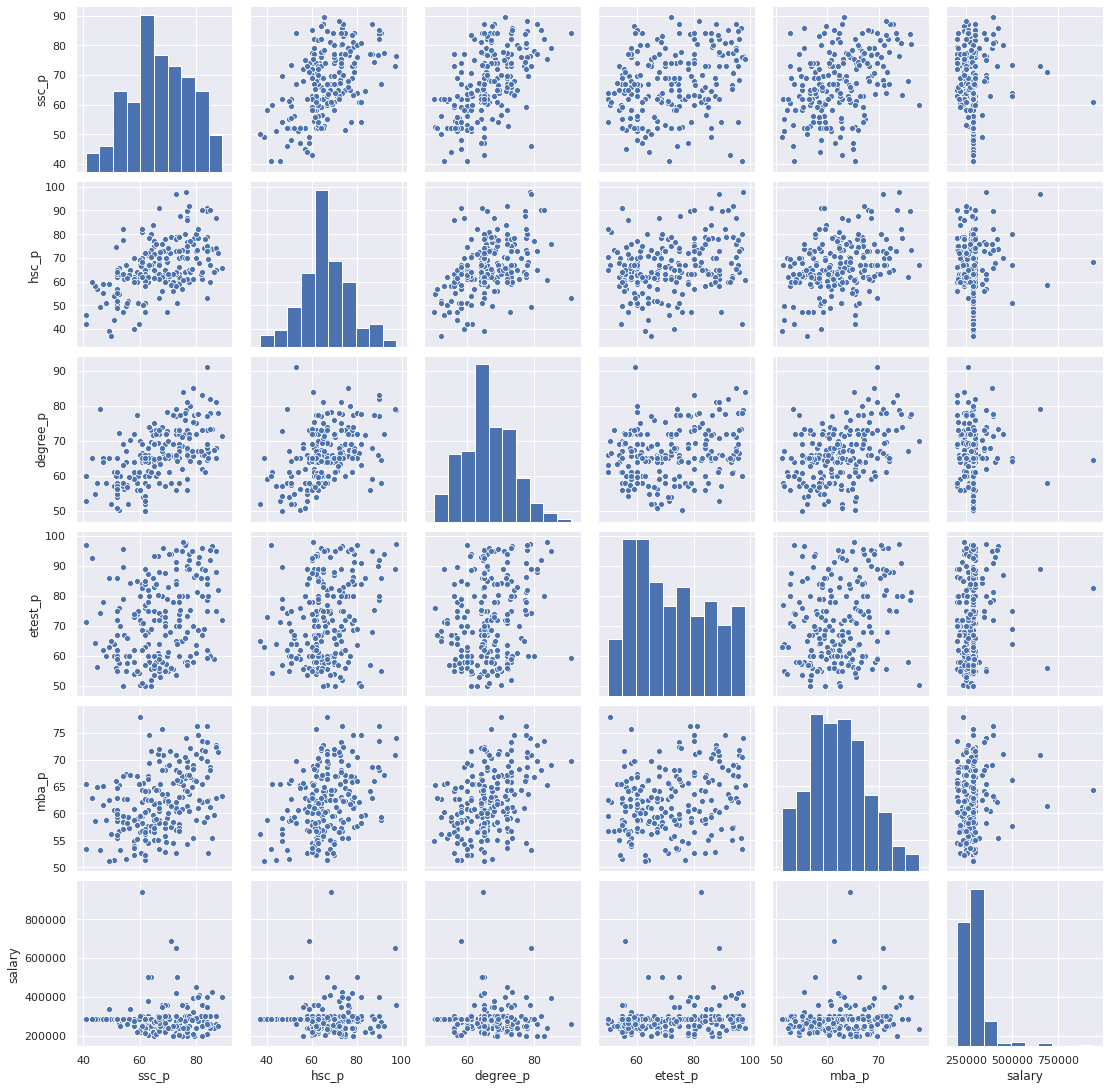

In [10]:
sns.pairplot(df_comp)

## Correlation between Salary, Employability Test %, Secondary Education % and Higher Secondary Education %

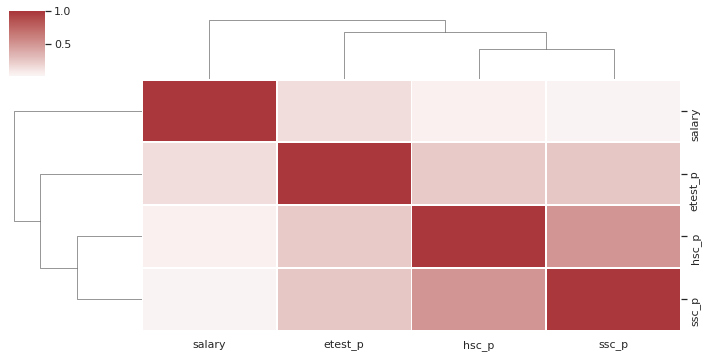

In [11]:
cor = df_comp.loc[:,["hsc_p","ssc_p",'etest_p',"salary"]]
sns.clustermap(cor.corr(), center=0, cmap="vlag",
               linewidths=.75, figsize=(10, 5))

##  Bubble Plot

In [12]:
!pip install bubbly
!pip install chart_studio

  Created wheel for bubbly: filename=bubbly-1.0.2-py3-none-any.whl size=5428 sha256=e3e4e5d2a43a47bddf354f9b39b71843f1114d1b7d089e92b4126337ee1e3a7e
  Stored in directory: /root/.cache/pip/wheels/85/c7/3d/38784ece9ac882d3afdb852ea8cf867df942fe6c71da5c4360
Successfully built bubbly
     |████████████████████████████████| 64 kB 1.2 MB/s eta 0:00:011


## Gender + Employability Test % v/s Salary

In [13]:
df_comp_bp = df_comp.head(30)
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import chart_studio.plotly as py


figure = bubbleplot(dataset=df_comp_bp, x_column='etest_p', y_column='salary', 
    bubble_column='gender', size_column='salary', color_column='gender', 
    x_logscale=True, scale_bubble=2, height=350)

iplot(figure)

## Specialisation + Employability Test v/s Salary

In [14]:
df_comp_bp = df_comp.head(30)
from bubbly.bubbly import bubbleplot 
from plotly.offline import iplot
import chart_studio.plotly as py


figure = bubbleplot(dataset=df_comp_bp, x_column='etest_p', y_column='salary', 
    bubble_column='specialisation', size_column='salary', color_column='specialisation', 
    x_logscale=True, scale_bubble=2, height=350)

iplot(figure)

## TreeChart

In [15]:
import plotly.express as px

## Specialization v/s Salary

In [16]:
df_tree = df_comp.groupby(["hsc_b","specialisation"])[["salary"]].mean().reset_index()

fig = px.treemap(df_tree, path=['hsc_b','specialisation'], values='salary',
                  color='salary', hover_data=['specialisation'],
                  color_continuous_scale='rainbow')
fig.show()

## Work Experience + Undergraduate Degree v/s Salary

In [17]:
df_tree = df_comp.groupby(["workex","degree_t"])[["salary"]].mean().reset_index()

fig = px.treemap(df_tree, path=['workex','degree_t'], values='salary',
                  color='salary', hover_data=['degree_t'],
                  color_continuous_scale='rainbow')
fig.show()

## Gender + Undergraduate Degree v/s Employability Test %

In [18]:
df_tree_1 = df_comp.copy()
df_tree_1['status'] = df_tree_1['status'].map({'Placed':1, 'Not Placed':0})

In [19]:
df_tree = df_tree_1.groupby(["gender","degree_t"])[["etest_p"]].mean().reset_index()

fig = px.treemap(df_tree, path=['gender','degree_t'], values='etest_p',
                  color='etest_p', hover_data=['degree_t'],
                  color_continuous_scale='rainbow')
fig.show()

## Pie Chart

## Gender v/s Salary

In [20]:
df_pie = df_comp.groupby(["gender"])[["salary"]].mean().reset_index()

fig = px.pie(df_pie,
             values="salary",
             names="gender",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label")
fig.show()

## Histogram

## Gender + Degree% v/s Count of Status(# placed/not-placed)

In [21]:
fig = px.histogram(df_comp, x="degree_p", y="status", color="gender")
fig.show()

## Trendline

## Degree% v/s Salary

In [22]:
fig = px.scatter(df_comp, x="degree_p", y="salary", trendline="ols")
fig.show()

## Employability Test % v/s Salary

In [23]:
fig = px.scatter(df_comp, x="etest_p", y="salary", trendline="ols")
fig.show()

## Violin Plot

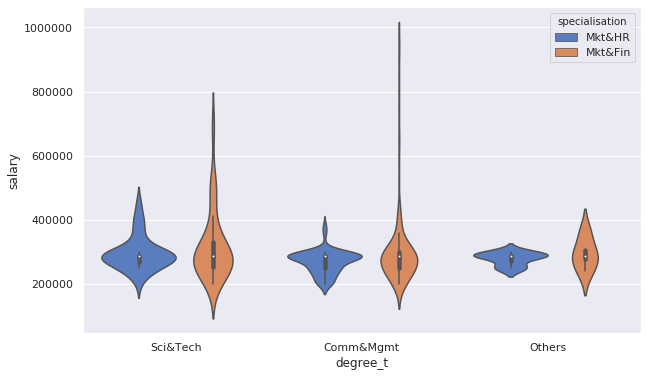

In [24]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(x="degree_t", y="salary", hue="specialisation",
                    data=df_comp, palette="muted")

## Swarm Plot

## Gender v/s Salary

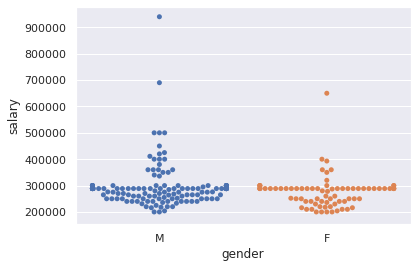

In [25]:
ax = sns.swarmplot(x="gender", y="salary", data= df_comp)

## Work Experience v/s Salary

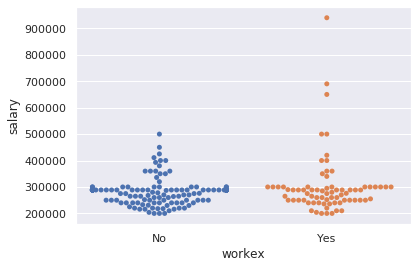

In [26]:
ax = sns.swarmplot(x="workex", y="salary", data=df_comp)

In [27]:
df = df_comp.copy()

# Logistic Regression

In [28]:
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### Preparing Data for Logistic Regression

In [29]:
df_log = df.copy()

In [30]:
df['hsc_b'].unique()

array(['Others', 'Central'], dtype=object)

In [31]:
df_log.ssc_b = df_log['ssc_b'].map({'Others':1, 'Central':0})
df_log.hsc_b = df_log['hsc_b'].map({'Others':1, 'Central':0})
df_log.hsc_s = df_log['hsc_s'].map({'Arts':2, 'Commerce':1, 'Science':0})
df_log.degree_t = df_log['degree_t'].map({'Others':2, 'Comm&Mgmt':1, 'Sci&Tech':0})
df_log.workex =  df_log['workex'].map({'Yes':1, 'No':0})
df_log.specalisation = df_log['specialisation'].map({'Mkt&HR':1, 'Mkt&Fin':0})
df_log.status = df_log['status'].map({'Placed':1, 'Not Placed':0})
df_log.gender = df_log['gender'].map({'F':1,'M':0})

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [32]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    int64  
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    int64  
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    int64  
 5   hsc_s           215 non-null    int64  
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    int64  
 8   workex          215 non-null    int64  
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    int64  
 13  salary          215 non-null    float64
dtypes: float64(6), int64(7), object(1)
memory usage: 23.6+ KB


### Splitting the Data into Training and Testing Data with an 80:20 Split

In [33]:
df_log

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,0,67.00,1,91.00,1,1,58.00,0,0,55.0,Mkt&HR,58.80,1,270000.000000
1,0,79.33,0,78.33,1,0,77.48,0,1,86.5,Mkt&Fin,66.28,1,200000.000000
2,0,65.00,0,68.00,0,2,64.00,1,0,75.0,Mkt&Fin,57.80,1,250000.000000
3,0,56.00,0,52.00,0,0,52.00,0,0,66.0,Mkt&HR,59.43,0,288655.405405
4,0,85.80,0,73.60,0,1,73.30,1,0,96.8,Mkt&Fin,55.50,1,425000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,1,82.00,1,1,77.60,1,0,91.0,Mkt&Fin,74.49,1,400000.000000
211,0,58.00,1,60.00,1,0,72.00,0,0,74.0,Mkt&Fin,53.62,1,275000.000000
212,0,67.00,1,67.00,1,1,73.00,1,1,59.0,Mkt&Fin,69.72,1,295000.000000
213,1,74.00,1,66.00,1,1,58.00,1,0,70.0,Mkt&HR,60.23,1,204000.000000


In [34]:
inputs = df_log[['ssc_p', 'hsc_p', 'degree_p','workex', 'etest_p', 'mba_p']]
targets = df_log['status']

In [35]:
x_train,x_test,y_train,y_test = train_test_split(inputs, targets, test_size = 0.2, random_state = 365)

## The Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [37]:
logreg = LogisticRegression()
results_log = logreg.fit(x_train,y_train)

In [38]:
y_pred=logreg.predict(x_test)

### Confusion Martix
### [True Positive, False Negative]
### [False Positive, True Negative]

#### There is also a list of rates that are often computed from a confusion matrix for a binary classifier:
#### Accuracy: Overall, how often is the classifier correct?
#### Accuracy = (TP+TN)/total
#### Misclassification Rate(Error Rate): Overall, how often is it wrong?
#### Misclassification Rate = (FP+FN)/total
#### True Positive Rate(Sensitivity or Recall): When it’s actually yes, how often does it predict yes?
#### True Positive Rate = TP/actual yes
#### False Positive Rate: When it’s actually no, how often does it predict yes?
#### False Positive Rate=FP/actual no
#### True Negative Rate(Specificity): When it’s actually no, how often does it predict no?
#### True Negative Rate=TN/actual no
#### Precision: When it predicts yes, how often is it correct?
#### Precision=TP/predicted yes
#### Prevalence: How often does the yes condition actually occur in our sample?
#### Prevalence=actual yes/total

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 9,  6],
       [ 1, 27]])

Text(0.5, 257.44, 'Predicted label')

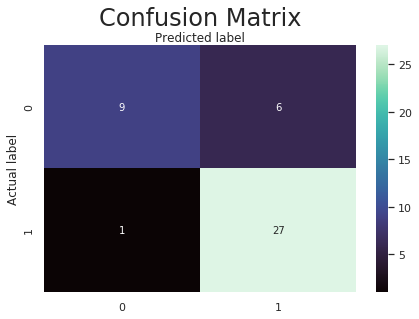

In [40]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8372093023255814
Precision: 0.8181818181818182
Recall: 0.9642857142857143


### ROC Curve
#### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate(Recall) against the false positive rate. It shows the tradeoff between sensitivity and specificity.
#### AUC(Area Under Curve) score for the case is 0.96. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

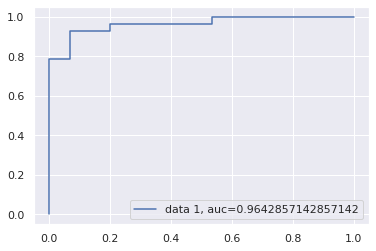

In [42]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Naive Bayes Classification

In [43]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train);

In [44]:
pred = model.predict(x_test)

In [45]:
acc = model.score(x_test,y_test)
print("Accuracy = " + str((acc*100).round(3))+"%")

Accuracy = 83.721%


# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
model = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
y_pred = model.predict(x_test)

## Validating Performance of Random Forest Model

### Confusion Matrix

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[11,  4],
       [ 1, 27]])

Text(0.5, 257.44, 'Predicted label')

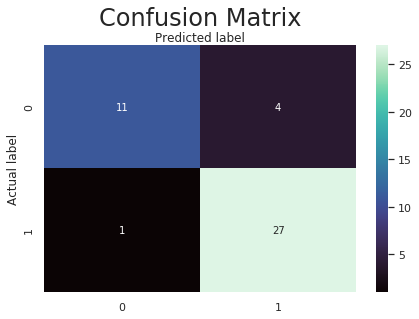

In [51]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(1)
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="mako" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1, size = 24)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [52]:
print("Accuracy = "+ str(((model.score(x_test,y_test))*100).round(3))+"%")

Accuracy = 88.372%


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [54]:
rfc_cv_score = cross_val_score(model, x_test, y_test, cv=10, scoring='roc_auc')

In [55]:
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        15
           1       0.87      0.96      0.92        28

    accuracy                           0.88        43
   macro avg       0.89      0.85      0.87        43
weighted avg       0.89      0.88      0.88        43



=== All AUC Scores ===
[1.         1.         0.66666667 1.         1.         1.
 1.         1.         1.         1.        ]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9666666666666666


In [56]:
from sklearn.metrics import plot_roc_curve

### ROC (Receiver Operating Charateristic) Curve

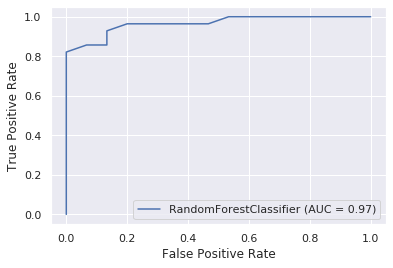

In [57]:
rfc_ROC_disp = plot_roc_curve(model, x_test, y_test)
plt.show()

# Support Vector Machine Classifier

In [58]:
from sklearn import svm

In [59]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [60]:
print("Accuracy:",str(((metrics.accuracy_score(y_test, y_pred))*100).round(3)) + "%")

Accuracy: 83.721%


In [61]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.8181818181818182
Recall: 0.9642857142857143


# Deep Neural Network(DNN) for Predicting Placement Status

In [62]:
#import numpy as np
import tensorflow as tf
from sklearn import preprocessing

In [63]:
unscaled_inputs_all = df[['ssc_p','hsc_p','degree_p','etest_p','mba_p']]
targets_all = df_log['status']

### Balancing the Dataset

In [64]:
num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

In [65]:
for i in range(targets_all.shape[0]):
    if targets_all[i] == 0:
        zero_targets_counter +=1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)

unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)

targets_equal_priors = np.delete(targets_all, indices_to_remove, axis = 0)

### Standardizing the Inputs

In [66]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

### Shuffling the Data

In [67]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

In [68]:
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_all[shuffled_indices]

### Splitting the Data into Training, Validation and Testing Set

In [69]:
samples_count = shuffled_inputs.shape[0]

In [70]:
train_samples_count = int(0.8 * samples_count)
validation_samples_count = int(0.8 * samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

In [71]:
train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count + validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count + validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count + validation_samples_count:]
test_targets = shuffled_targets[train_samples_count + validation_samples_count:]

### Saving the DataFrames in .npz format

In [72]:
np.savez('placement_train_data', inputs = train_inputs, targets = train_targets)
np.savez('placement_validation_data', inputs = validation_inputs, targets = validation_targets)
np.savez('placement_test_data', inputs = test_inputs, targets = test_targets)

## Outlining the DNN Model

### Loading the .npz files

In [73]:
npz = np.load('/kaggle/working/placement_train_data.npz')
train_inputs, train_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('/kaggle/working/placement_validation_data.npz')
validation_inputs, validation_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)

npz = np.load('/kaggle/working/placement_test_data.npz')
test_inputs, test_targets = npz['inputs'].astype(np.float), npz['targets'].astype(np.int)


## The Model

In [74]:
input_size = 5
output_size = 2

hidden_layer_size = 55

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

batch_size = 55
max_epochs = 100

#### Early Stopping

In [76]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)

#### Fitting the Data to the Model

In [77]:
history = model.fit(train_inputs, train_targets,
         batch_size = batch_size,
         epochs= max_epochs,
         callbacks = [early_stopping],
         validation_data = (validation_inputs, validation_targets),
         verbose = 1)

Train on 172 samples, validate on 43 samples
Epoch 1/100
172/172 [==============================] - 1s 4ms/sample - loss: 4.0425 - accuracy: 0.0058 - val_loss: 3.8546 - val_accuracy: 0.0930
Epoch 2/100
172/172 [==============================] - 0s 118us/sample - loss: 3.8815 - accuracy: 0.1047 - val_loss: 3.6904 - val_accuracy: 0.2791
Epoch 3/100
172/172 [==============================] - 0s 105us/sample - loss: 3.7246 - accuracy: 0.2616 - val_loss: 3.5268 - val_accuracy: 0.4884
Epoch 4/100
172/172 [==============================] - 0s 99us/sample - loss: 3.5694 - accuracy: 0.4767 - val_loss: 3.3553 - val_accuracy: 0.6744
Epoch 5/100
172/172 [==============================] - 0s 96us/sample - loss: 3.4054 - accuracy: 0.6395 - val_loss: 3.1697 - val_accuracy: 0.8140
Epoch 6/100
172/172 [==============================] - 0s 93us/sample - loss: 3.2290 - accuracy: 0.7384 - val_loss: 2.9633 - val_accuracy: 0.8140
Epoch 7/100
172/172 [==============================] - 0s 100us/sample - loss:

In [78]:
model.save_weights("model.h5")

### Visualising Training

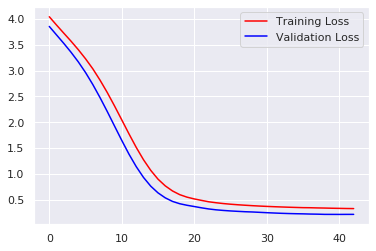

In [79]:
plt.plot(history.history['loss'], color = 'red', label = 'Training Loss')
plt.plot(history.history['val_loss'], color = 'blue', label = 'Validation Loss')
plt.legend()
plt.show()


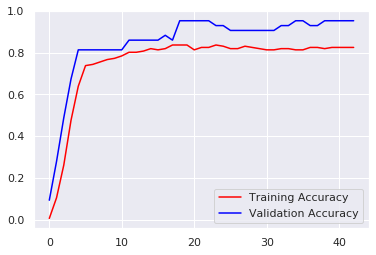

In [80]:
plt.plot(history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.legend()
plt.show()

# Hence, We see that the DNN Model is the best perfroming model with 95.35% Validation Accuracy

## Kindly upvote if you found this notebook useful! Thank you!